### 1- importing libraires

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [89]:
df = pd.read_csv(r"E:\Data Set\calories.csv")
df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [90]:
df1 = pd.read_csv(r"E:\Data Set\exercise.csv")
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [91]:
data = pd.merge(df , df1 , on = 'User_ID')

In [92]:
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [93]:
data.shape

(15000, 9)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [95]:
data.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [96]:
data.duplicated().sum()

0

In [97]:
data.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [98]:
data['Gender'].replace(['female' , 'male'] , [0 , 1] , inplace=True)

In [99]:
data = data.drop(['User_ID'] , axis = 1)

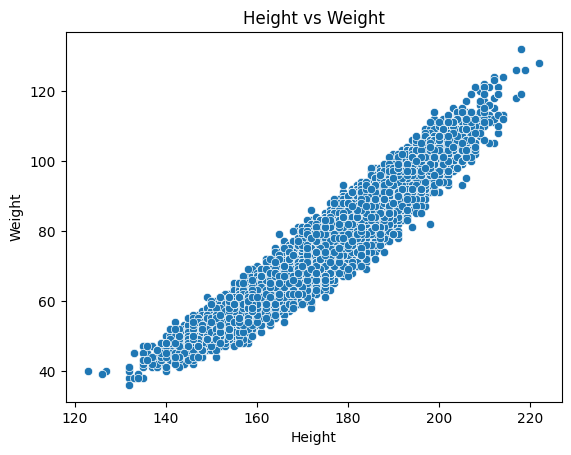

In [100]:
sns.scatterplot(x = 'Height' , y = 'Weight' , data = data)
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

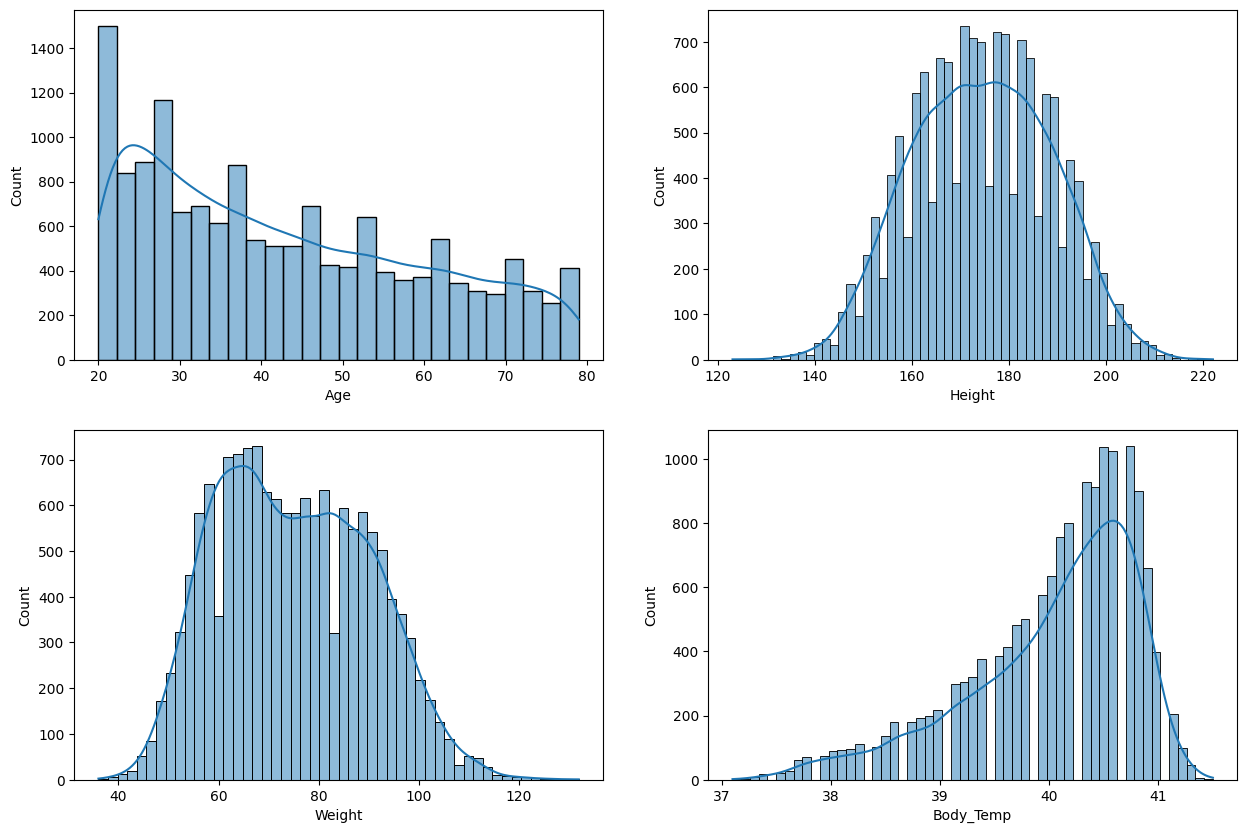

In [101]:
features = ['Age', 'Height', 'Weight','Body_Temp']

plt.figure(figsize = (15 , 10))
for i ,col in enumerate (features):
    plt.subplot(2 , 2 , i+1)
    sns.histplot(data[col] , kde = True)    
plt.show()

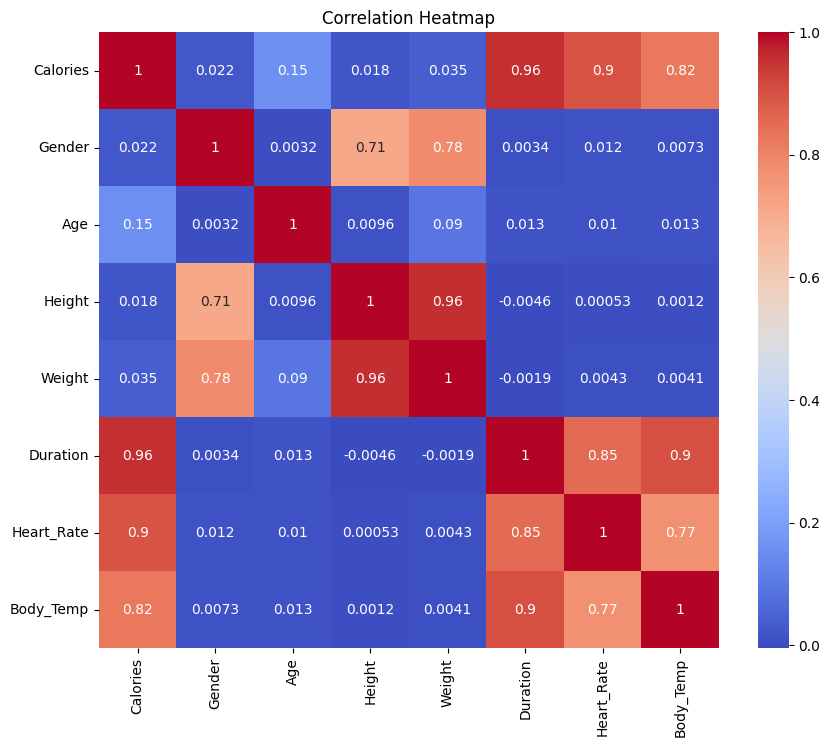

In [102]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr() , annot = True , cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [103]:
X = data.drop(['Calories'] , axis = 1)
y = data['Calories']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

In [105]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12300, 7), (2700, 7), (12300,), (2700,))

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
model = XGBRegressor()

model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [112]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print("Training Mean Squared Error:", mean_squared_error(y_train, y_pred_train))
print("Training R-squared:", r2_score(y_train, y_pred_train))

print('-' * 50)

print("Training Mean Squared Error:", mean_squared_error(y_train, y_pred_train))
print("Testing R-squared:", r2_score(y_test, y_pred_test))


Training Mean Squared Error: 1.7029754709145197
Training R-squared: 0.9995604827790154
--------------------------------------------------
Training Mean Squared Error: 1.7029754709145197
Testing R-squared: 0.998852480379816
